In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('emails.csv')
print(df.shape)
df.head()

(5728, 2)


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


### VISUALIZE DATASET

In [8]:
ham = df[df['spam'] == 0]
spam = df[df['spam'] == 1]

In [9]:
print('Spam Percentage: ', round(len(spam)/len(df)*100, 2), '%')
print('Ham Percentage: ', round(len(ham)/len(df)*100, 2), '%')

Spam Percentage:  23.88 %
Ham Percentage:  76.12 %


### CREATE TESTING AND TRAINING DATA SET

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

spamham_countvectorizer = vectorizer.fit_transform(df['text'])
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'zzn', 'zzncacst', 'zzzz'], dtype=object)

In [14]:
spamham_countvectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
spamham_countvectorizer.shape

(5728, 37303)

### TRAIN MODEL

In [16]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(spamham_countvectorizer, df['spam'])

MultinomialNB()

In [17]:
testing_sample = ['Free money!!!', 'Hi Kim, Please let me know if you need any further information. Thanks!']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)

In [18]:
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0])

### EVALUATE MODEL

In [20]:
testing_sample = ['Hello, I am Ryan. I would like to book a hotel in Bali by January 24th', 'money viagra!!!!',
                  'Money me. Money now. Me money needing a lot now!']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([0, 1, 1])

### FULL MODEL TRAINING AND EVALUATION

In [24]:
X = spamham_countvectorizer
print(X.shape)
y = df['spam']
print(y.shape)

(5728, 37303)
(5728,)


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('X Train: ', X_train.shape)
print('X Test: ', X_test.shape)
print('Y Train: ', y_train.shape)
print('Y Test', y_test.shape)

X Train:  (4582, 37303)
X Test:  (1146, 37303)
Y Train:  (4582,)
Y Test (1146,)


In [26]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

Text(50.722222222222214, 0.5, 'Truth')

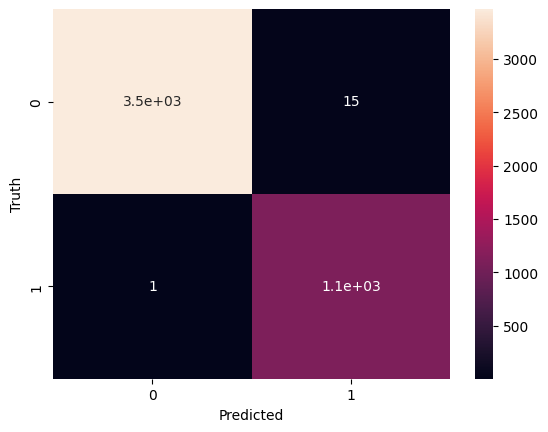

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = NB_classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(0.5, 23.52222222222222, 'Predicted')

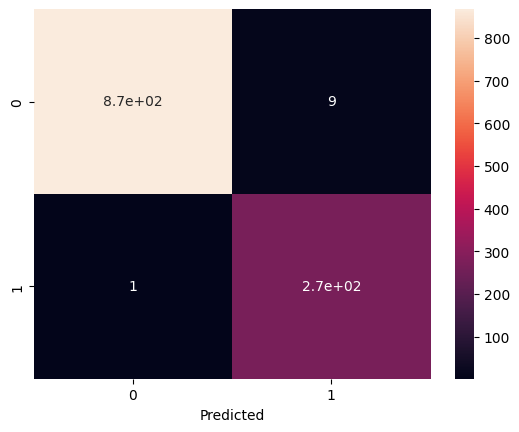

In [28]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')

In [30]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       877
           1       0.97      1.00      0.98       269

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

